In [1]:
import scanpy as sc
import pandas as pd 
import numpy as np
import seaborn as sns

from scipy.stats import pearsonr

import matplotlib.pyplot as plt

## gut

In [2]:
path = '/Genomics/pritykinlab/sarah/lipstic_analysis/ulipstic-analysis/iel_tcr_feb21.h5ad'

gene_ad = sc.read_h5ad(path)

gene_ad.X = gene_ad.layers["raw_counts"].copy()
sc.pp.normalize_total(gene_ad, target_sum = 10000)
sc.pp.log1p(gene_ad)
gene_ad.layers["log_lib_norm"] = gene_ad.X.copy()

hto_path = '/Genomics/pritykinlab/sarah/lipstic_analysis/ulipstic-analysis/gut.extra_sample_HTO_count_info.csv'
hto_info = pd.read_csv(hto_path, index_col=0)

gene_ad.obs['avg_sample_hto'] = hto_info['sample_counts_avgd']

new_biotin = np.log10(gene_ad.obs['raw_biotin'] + np.percentile(gene_ad.obs['raw_biotin'], 5))
gene_ad.obs['new_biotin'] = new_biotin - min(new_biotin)

new_biotin_temp = gene_ad.obs['raw_biotin'] / gene_ad.obs['avg_sample_hto']
new_biotin = np.log10(new_biotin_temp + np.percentile(new_biotin_temp, 5))
gene_ad.obs['other_new_biotin'] = new_biotin - min(new_biotin)

# new confounder variables
rna_logcounts = np.log10(gene_ad.obs['total_counts'] + np.percentile(gene_ad.obs['total_counts'], 0.1))
hash_logcounts = np.log10(gene_ad.obs['avg_sample_hto'] + np.percentile(gene_ad.obs['avg_sample_hto'], 0.1))

mean = np.mean(rna_logcounts)
std_dev = np.std(rna_logcounts)
# Standardize the array
rna_logcounts = (rna_logcounts - mean) / std_dev

mean = np.mean(hash_logcounts)
std_dev = np.std(hash_logcounts)
# Standardize the array
hash_logcounts = (hash_logcounts - mean) / std_dev

gene_ad.obs['log_sample_hashtag'] = hash_logcounts
gene_ad.obs['log_RNA_libsize'] = rna_logcounts

In [3]:
gene_ad.layers['theta_1'] = gene_ad.layers['pearson_theta_1'].copy()

In [4]:
gene_ad.X = gene_ad.layers['raw_counts'].copy()

In [5]:
gene_ad.write('datasets/gut_data_aug_11_2024.h5ad')

## lcmv sys

In [6]:
path = '/Genomics/pritykinlab/sarah/lipstic_analysis/ulipstic-analysis/lcmv_v2/tissue_nov_16.h5ad'

gene_ad = sc.read_h5ad(path)

gene_ad.obs['donor_cat'] = gene_ad.obs['donor'].astype('category')

gene_ad.obs['interactor_cat'] = gene_ad.obs['interactor'].astype('category')

gene_ad.X = gene_ad.layers["raw_counts"].copy()
sc.pp.normalize_total(gene_ad, target_sum = 10000)
sc.pp.log1p(gene_ad)
gene_ad.layers["log_lib_norm"] = gene_ad.X.copy()

new_biotin = np.log10(gene_ad.obs['biotin_interaction'] + np.percentile(gene_ad.obs['biotin_interaction'], 5))
gene_ad.obs['new_biotin'] = new_biotin - min(new_biotin)

new_biotin_temp = gene_ad.obs['biotin_interaction'] / gene_ad.obs['sample count']
new_biotin = np.log10(new_biotin_temp + np.percentile(new_biotin_temp, 5))
gene_ad.obs['other_new_biotin'] = new_biotin - min(new_biotin)

# new confounder variables
rna_logcounts = np.log10(gene_ad.obs['total_counts'] + np.percentile(gene_ad.obs['total_counts'], 0.1))
hash_logcounts = np.log10(gene_ad.obs['sample count'] + np.percentile(gene_ad.obs['sample count'], 0.1))

mean = np.mean(rna_logcounts)
std_dev = np.std(rna_logcounts)
# Standardize the array
rna_logcounts = (rna_logcounts - mean) / std_dev

mean = np.mean(hash_logcounts)
std_dev = np.std(hash_logcounts)
# Standardize the array
hash_logcounts = (hash_logcounts - mean) / std_dev

gene_ad.obs['log_sample_hashtag'] = hash_logcounts
gene_ad.obs['log_RNA_libsize'] = rna_logcounts

In [7]:
gene_ad.X = gene_ad.layers['raw_counts'].copy()

In [8]:
gene_ad

AnnData object with n_obs × n_vars = 12324 × 11558
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_genes', 'likely sample', 'biotin_interaction', 'biotin_donor', 'biotin sample', 'sample count', 'cell_norm_biotin', 'cell_norm_donor', 'sample_lane', 'timepoint', 'infection', 'sample origin', 'leiden', 'tissue', 'annot', 'doublet_score', 'predicted_doublet', 'likely doublet', 'B', 'Cd4 Treg', 'Cd8', 'DC1', 'DC2', 'NK cell', 'eff-like Cd8', 'macrophage', 'monocyte', 'neutrophil', 'unsure', 'B_score', 'Cd4_score', 'Cd4 Treg_score', 'Cd8_score', 'DC1_score', 'DC2_score', 'NK cell_score', 'eff-like Cd8_score', 'macrophage_score', 'monocyte_score', 'neutrophil_score', 'unsure_score', 'annot v2', 'log normalized biotin', 'normalized biotin', 'cd8', 'donor', ' donor ', 'interactor', ' interactor ', ' annot ', ' annot v2 ', 'background', 'annot ', ' normalized biotin ', 'mouse', 'log normalized donor', 'normalized donor', 'donor_cat', 'interactor_cat', 'new_b

/Genomics/argo/users/ta4188/.conda/envs/xenium/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Genomics/argo/users/ta4188/.conda/envs/xenium/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


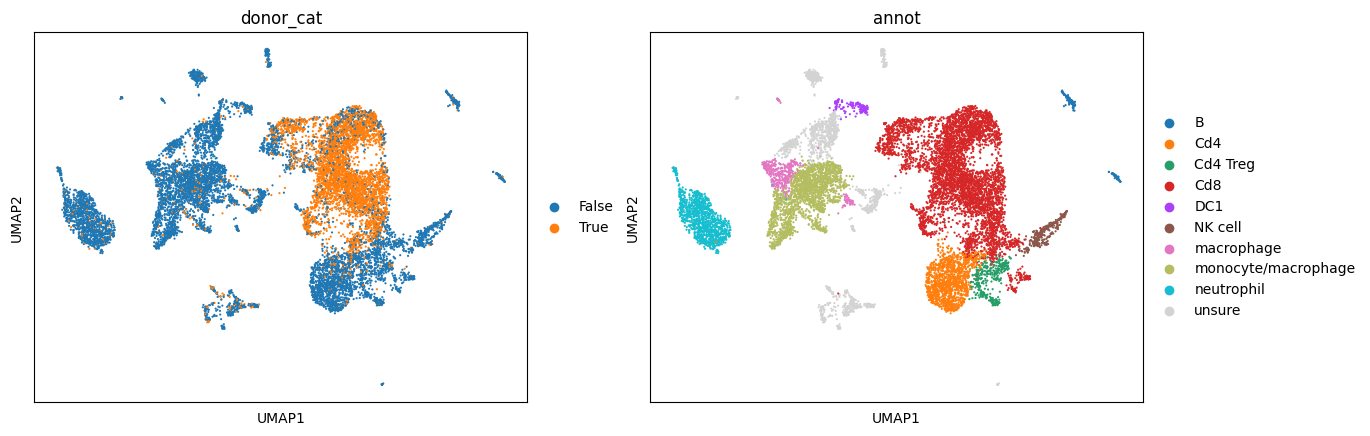

In [6]:
sc.pl.umap(gene_ad, color=['donor_cat', 'annot'])

In [9]:
gene_ad.write('datasets/lcmv_sys_data_aug_11_2024.h5ad')

## lcmv ln

In [10]:
path = '/Genomics/pritykinlab/sarah/lipstic_analysis/ulipstic-analysis/lcmv_v2/dec1_wt_medln.h5ad'

gene_ad = sc.read_h5ad(path)

gene_ad.obs_names_make_unique()

gene_ad.obs['donor_cat'] = gene_ad.obs['donor'].astype('category')

gene_ad.obs['interactor_cat'] = gene_ad.obs['interactor'].astype('category')

gene_ad.X = gene_ad.layers["raw_counts"].copy()
sc.pp.normalize_total(gene_ad, target_sum = 10000)
sc.pp.log1p(gene_ad)
gene_ad.layers["log_lib_norm"] = gene_ad.X.copy()

new_biotin = np.log10(gene_ad.obs['biotin_interaction'] + np.percentile(gene_ad.obs['biotin_interaction'], 5))
gene_ad.obs['new_biotin'] = new_biotin - min(new_biotin)

new_biotin_temp = gene_ad.obs['biotin_interaction'] / gene_ad.obs['sample count']
new_biotin = np.log10(new_biotin_temp + np.percentile(new_biotin_temp, 5))
gene_ad.obs['other_new_biotin'] = new_biotin - min(new_biotin)

# new confounder variables
rna_logcounts = np.log10(gene_ad.obs['total_counts'] + np.percentile(gene_ad.obs['total_counts'], 0.1))
hash_logcounts = np.log10(gene_ad.obs['sample count'] + np.percentile(gene_ad.obs['sample count'], 0.1))

mean = np.mean(rna_logcounts)
std_dev = np.std(rna_logcounts)
# Standardize the array
rna_logcounts = (rna_logcounts - mean) / std_dev

mean = np.mean(hash_logcounts)
std_dev = np.std(hash_logcounts)
# Standardize the array
hash_logcounts = (hash_logcounts - mean) / std_dev

gene_ad.obs['log_sample_hashtag'] = hash_logcounts
gene_ad.obs['log_RNA_libsize'] = rna_logcounts

/Genomics/argo/users/ta4188/.conda/envs/xenium/lib/python3.9/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [11]:
gene_ad.X = gene_ad.layers['raw_counts'].copy()

In [12]:
gene_ad.write('datasets/lcmv_ln_data_aug_11_2024.h5ad')

## lipstic tumor

In [13]:
path = '/Genomics/pritykinlab/tamjeed/lipstic/lipstic_v1_exploration/data_import/processed_h5ad_outputs/'
path += 'lipstic_tumor_dataset_08_apr13_2024.h5ad'

gene_ad = sc.read_h5ad(path)

gene_ad.X = gene_ad.layers["raw_counts"].copy()
sc.pp.normalize_total(gene_ad, target_sum = 10000)
sc.pp.log1p(gene_ad)
gene_ad.layers["log_lib_norm"] = gene_ad.X.copy()

new_biotin = np.log10(gene_ad.obs['biotin_raw'] + np.percentile(gene_ad.obs['biotin_raw'], 5))
gene_ad.obs['new_biotin'] = new_biotin - min(new_biotin)

new_biotin_temp = gene_ad.obs['biotin_raw'] / gene_ad.obs['hash_max']
new_biotin = np.log10(new_biotin_temp + np.percentile(new_biotin_temp, 5))
gene_ad.obs['other_new_biotin'] = new_biotin - min(new_biotin)

# new confounder variables
rna_logcounts = np.log10(gene_ad.obs['nCount_RNA'] + np.percentile(gene_ad.obs['nCount_RNA'], 0.1))
hash_logcounts = np.log10(gene_ad.obs['hash_max'] + np.percentile(gene_ad.obs['hash_max'], 0.1))

mean = np.mean(rna_logcounts)
std_dev = np.std(rna_logcounts)
# Standardize the array
rna_logcounts = (rna_logcounts - mean) / std_dev

mean = np.mean(hash_logcounts)
std_dev = np.std(hash_logcounts)
# Standardize the array
hash_logcounts = (hash_logcounts - mean) / std_dev

gene_ad.obs['log_sample_hashtag'] = hash_logcounts
gene_ad.obs['log_RNA_libsize'] = rna_logcounts

gene_ad.obs['annotation'] = pd.Series('Tumor Antigen Myeloids', index=gene_ad.obs.index).astype('category')

In [14]:
fine_annotations = pd.read_csv('../model_lipstic_tumor/annotation.dc.csv', index_col=0)

In [15]:
gene_ad.obs['annotation_fine'] = fine_annotations.astype('category')

In [21]:
sorted(gene_ad.obs['annotation_fine'].unique())

['Cycling', 'Mo/MF', 'cDC1', 'cDC2', 'mRegDC1', 'mRegDC2']

In [16]:
gene_ad

AnnData object with n_obs × n_vars = 10346 × 10898
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.mt.log2', 'nCount_HTO', 'nFeature_HTO', 'nCount_ADT', 'nFeature_ADT', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'hash.ID', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.1', 'SCT_snn_res.0.2', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.5', 'SCT_snn_res.0.6', 'SCT_snn_res.0.7', 'SCT_snn_res.0.8', 'SCT_snn_res.0.9', 'SCT_snn_res.1', 'seurat_clusters', 'Hash', 'Enrichment', 'Ab_Group', 'S.Score', 'G2M.Score', 'Phase', 'Phase2', 'Biotin_Group2', 'Biotin_Ab_Group', 'Lipstic1', 'hash_max', 'hash_id', 'biotin_raw', 'n_counts', 'new_biotin', 'other_new_biotin', 'log_sample_hashtag', 'log_RNA_libsize', 'annotation', 'annotation_fine'
    var: 'name', 'n_counts'
    uns: 'log1p'
    obsm: 'X_pca', 'X_umap'
    layers: 'raw_counts', 'log_lib_norm'

In [17]:
gene_ad.X = gene_ad.layers["raw_counts"].copy()
sc.experimental.pp.normalize_pearson_residuals(gene_ad, theta = 1, inplace = True)
lay = "theta_"+ str(round(1, 1))
gene_ad.layers[lay] = gene_ad.X.copy()

In [18]:
gene_ad

AnnData object with n_obs × n_vars = 10346 × 10898
    obs: 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.mt.log2', 'nCount_HTO', 'nFeature_HTO', 'nCount_ADT', 'nFeature_ADT', 'HTO_maxID', 'HTO_secondID', 'HTO_margin', 'HTO_classification', 'hash.ID', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.1', 'SCT_snn_res.0.2', 'SCT_snn_res.0.3', 'SCT_snn_res.0.4', 'SCT_snn_res.0.5', 'SCT_snn_res.0.6', 'SCT_snn_res.0.7', 'SCT_snn_res.0.8', 'SCT_snn_res.0.9', 'SCT_snn_res.1', 'seurat_clusters', 'Hash', 'Enrichment', 'Ab_Group', 'S.Score', 'G2M.Score', 'Phase', 'Phase2', 'Biotin_Group2', 'Biotin_Ab_Group', 'Lipstic1', 'hash_max', 'hash_id', 'biotin_raw', 'n_counts', 'new_biotin', 'other_new_biotin', 'log_sample_hashtag', 'log_RNA_libsize', 'annotation', 'annotation_fine'
    var: 'name', 'n_counts'
    uns: 'log1p', 'pearson_residuals_normalization'
    obsm: 'X_pca', 'X_umap'
    layers: 'raw_counts', 'log_lib_norm', 'theta_1'

In [19]:
gene_ad.X = gene_ad.layers['raw_counts'].copy()

In [20]:
gene_ad.write('datasets/lipstic_tumor_data_aug_11_2024.h5ad')